## Análisis del Problema

## Autores
   * Daniel Vargas

## Librerías

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Análisis del Problema

# Autores
   * Daniel Vargas

## Librerías

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from sklearn.linear_model import LinearRegression

## Entendimiento de los Datos

In [ ]:
!wget https://raw.githubusercontent.com/LDVargas/IA_Datasets/master/store.csv

--2021-09-29 05:11:55--  https://raw.githubusercontent.com/LDVargas/IA_Datasets/master/store.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17333449 (17M) [text/plain]
Saving to: ‘store.csv.2’

store.csv.2         100%[===================>]  16.53M  74.8MB/s    in 0.2s    

2021-09-29 05:11:57 (74.8 MB/s) - ‘store.csv.2’ saved [17333449/17333449]



In [ ]:
data = pd.read_csv('/content/store.csv',na_values='?',sep=',')

In [ ]:
data

date  store  item  sales
0       2013-01-01      1     1     13
1       2013-01-02      1     1     11
2       2013-01-03      1     1     14
3       2013-01-04      1     1     13
4       2013-01-05      1     1     10
...            ...    ...   ...    ...
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

[913000 rows x 4 columns]

In [ ]:
data["date"]=pd.to_datetime(data["date"])

In [ ]:
#shape
data.shape

(913000, 4)

In [ ]:
#head of data

data.head()

date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10

In [ ]:
#tail of data

data.tail()

date  store  item  sales
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

In [ ]:
#now lets check shape
data.shape

#lets verify whether nan is present in columns
'nan' in data.columns
#so its proved that nan is not in columns 

False

In [ ]:
# Numero de registros del dataset
print("Cantidad de registros:",len(data))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(data.columns))
# Tipos de datos del dataset
print("Tipo de datos:",data.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",data.shape)

Cantidad de registros: 913000
Cantidad de columnas: 4
Tipo de datos: [dtype('<M8[ns]') dtype('int64')]
Filas y columnas: (913000, 4)


In [ ]:
data.head()

date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [ ]:
cols = ['store', 'item']
data.drop(cols, axis=1, inplace=True)

In [ ]:
data = data.sort_values('date')
data.isnull().sum()

date     0
sales    0
dtype: int64

In [ ]:
data

date  sales
0      2013-01-01     13
211816 2013-01-01     26
832656 2013-01-01     27
213642 2013-01-01     54
215468 2013-01-01     35
...           ...    ...
619013 2017-12-31     21
620839 2017-12-31     32
622665 2017-12-31     55
598927 2017-12-31    100
912999 2017-12-31     82

[913000 rows x 2 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.9 MB


In [ ]:
data = data.groupby(pd.Grouper(freq='M',key='date'))['sales'].sum().reset_index()

#g = df1.groupby(pd.Grouper(freq="M"))

#data = data.groupby(pd.Grouper(freq='M', key='Date'))

#data = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
data

date    sales
0  2013-01-31   454904
1  2013-02-28   459417
2  2013-03-31   617382
3  2013-04-30   682274
4  2013-05-31   763242
5  2013-06-30   795597
6  2013-07-31   855922
7  2013-08-31   766761
8  2013-09-30   689907
9  2013-10-31   656587
10 2013-11-30   692643
11 2013-12-31   506607
12 2014-01-31   525987
13 2014-02-28   529117
14 2014-03-31   704301
15 2014-04-30   788914
16 2014-05-31   882877
17 2014-06-30   906842
18 2014-07-31   989010
19 2014-08-31   885596
20 2014-09-30   785124
21 2014-10-31   758883
22 2014-11-30   800783
23 2014-12-31   578048
24 2015-01-31   552513
25 2015-02-28   551317
26 2015-03-31   730951
27 2015-04-30   824467
28 2015-05-31   926902
29 2015-06-30   937184
30 2015-07-31  1037350
31 2015-08-31   920401
32 2015-09-30   823332
33 2015-10-31   797253
34 2015-11-30   827645
35 2015-12-31   607572
36 2016-01-31   602439
37 2016-02-29   614957
38 2016-03-31   790881
39 2016-04-30   901950
40 2016-05-31   988730
41 2016-06-30  1022664
42 2016-07-31  1138718
43 2016-08-31   981494
44 2016-09-30   896831
45 2016-10-31   863637
46 2016-11-30   891448
47 2016-12-31   663411
48 2017-01-31   617306
49 2017-02-28   621369
50 2017-03-31   822667
51 2017-04-30   938862
52 2017-05-31  1020686
53 2017-06-30  1064624
54 2017-07-31  1171393
55 2017-08-31  1026403
56 2017-09-30   935263
57 2017-10-31   891160
58 2017-11-30   928837
59 2017-12-31   695170

## Exploración de los Datos

In [ ]:
data.index = data.date

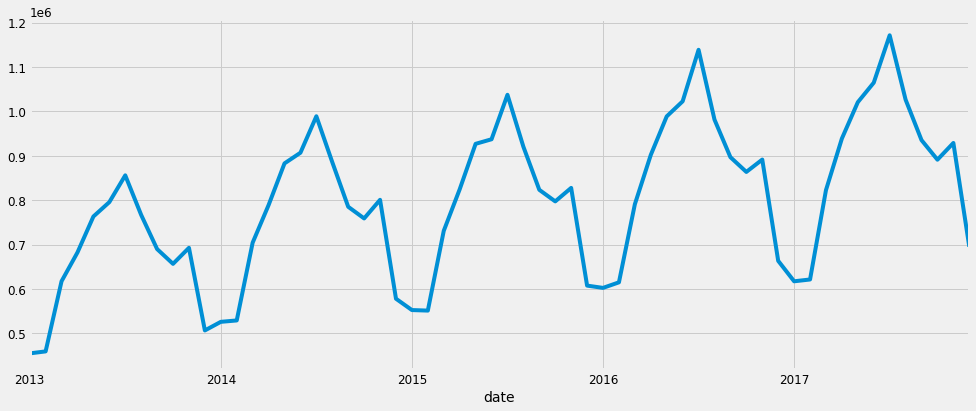

In [ ]:
y= data['sales']
y.replace('M')
y.mean()
#y = data['Close'].resample('D').mean()
y.plot(figsize=(15, 6))
plt.show()
#y

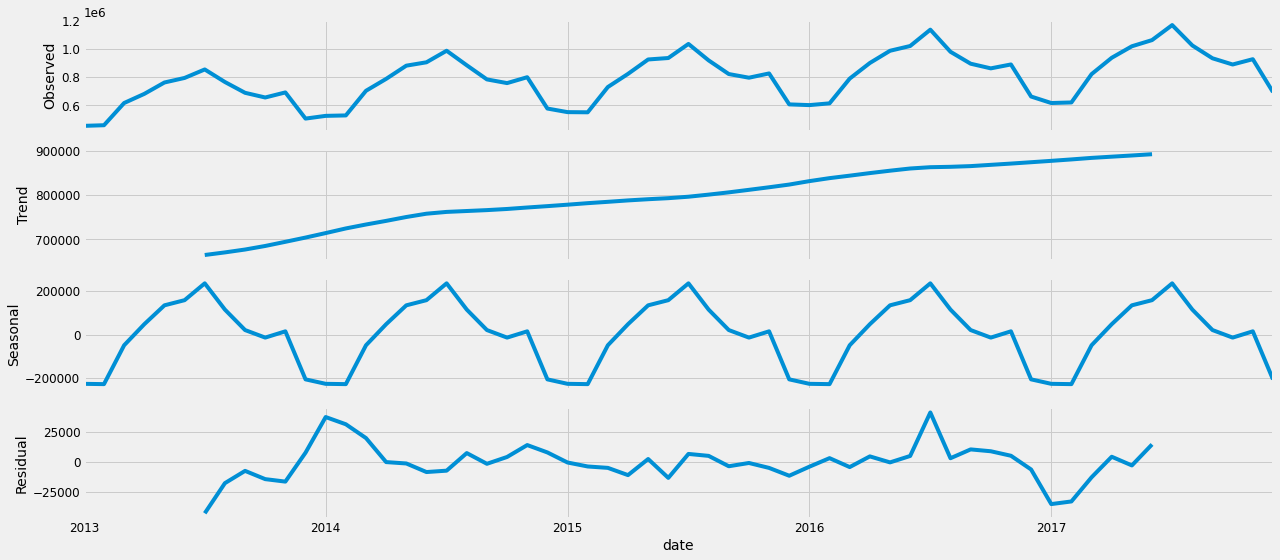

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
#data["Date"]=pd.to_datetime(data["Date"])
#y = pd.to_numeric(y)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Modelo de Machine Learning

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1775.9743967500065
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1386.892941045441
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1179.6266962860743
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1493.803859830268
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1141.2214771727804
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1064.2900067414419
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:854.7922751569532
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1379.0302692272553
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1708.3259911953185
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1435.9465039925044
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1122.8435614347259
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:3034.164146236771
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1401.0471793584725
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1436.3287123042437
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:870.9635031485094
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2981.2493452716194
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1510.3936908291362
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1176.2427303717097
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AI

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                #order=(1, 1, 1),  #original
                                #seasonal_order=(1, 1, 0, 12), #original
                                order=(1, 1, 0),#
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2463      0.231     -1.065      0.287      -0.700       0.207
ar.S.L12      -0.1259      0.201     -0.627      0.531      -0.519       0.268
sigma2      2.956e+08   1.62e-10   1.82e+18      0.000    2.96e+08    2.96e+08


## Evaluación

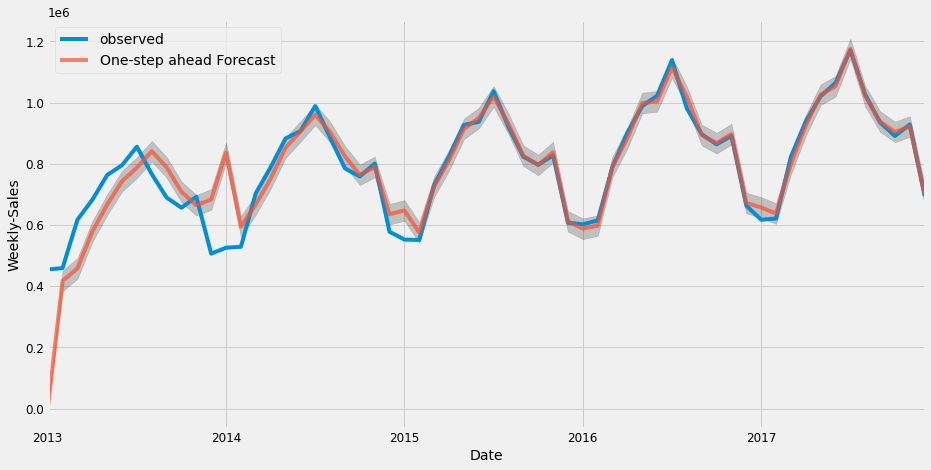

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=False)#2015-04-30
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly-Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2013-01-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 7321718936.82


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 85567.04


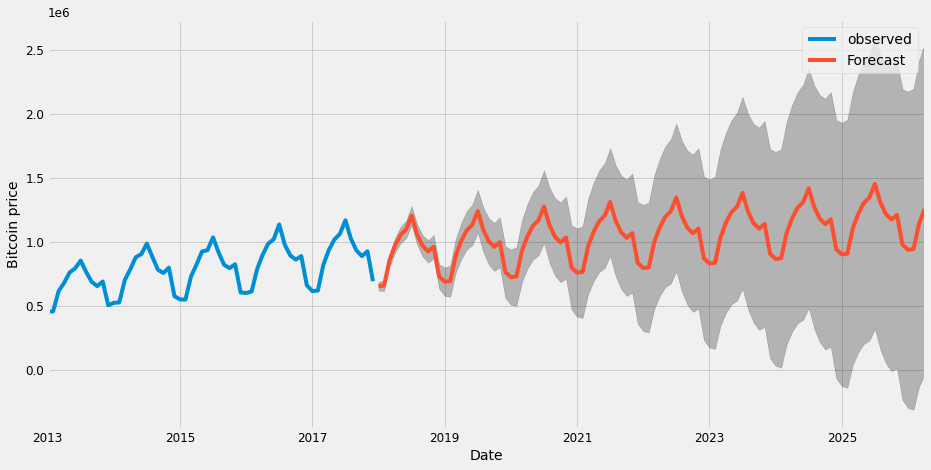

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin price')
plt.legend()
plt.show()

In [ ]:
pred_ci

lower sales   upper sales
2018-01-31  622160.836932  6.895520e+05
2018-02-28  618387.360596  7.027753e+05
2018-03-31  808452.495360  9.091161e+05
2018-04-30  917223.125804  1.031396e+06
2018-05-31  993588.027576  1.119939e+06
...                   ...           ...
2025-12-31 -234757.045293  2.195809e+06
2026-01-31 -295431.735814  2.176338e+06
2026-02-28 -309746.916700  2.199955e+06
2026-03-31 -130192.730375  2.417499e+06
2026-04-30  -33232.503758  2.551739e+06

[100 rows x 2 columns]

## Resultados

El set de datos contenía demasiados registros diarios, por lo que se procedió a agruparlos en meses para poder mejorar la efectividad del modelo. Como resultado se pudo observar que el modelo se ajusta casi perfecto a los datos y se pueden hacer predicciones ingresando a cuantos meses se quiere predecir el inventario o ingresando una fecha que corresponda al último día de cada mes.

In [ ]:
'''import pickle
with open('sales.sav','wb') as f:
    pickle.dump(pred,f)'''

import pickle
filename = 'sales'
pickle.dump(results, open(filename, 'wb'))